In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

from sklearn.neighbors import KNeighborsRegressor
from datetime import datetime

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
# Display basic information about the datasets
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

NA Values

In [5]:
# Check for missing values
print("\nMissing Values in Customers:")
print(customers.isnull().sum())
print("\nMissing Values in Products:")
print(products.isnull().sum())
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:
# Convert data types
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

Summary stats

In [7]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [8]:
print("\nDescriptive Statistics for Transactions:")
print(transactions.describe())


Descriptive Statistics for Transactions:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


In [9]:
print("\nDescriptive Statistics for customers:")
print(customers.describe())


Descriptive Statistics for customers:
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00


In [10]:
print("\nDescriptive Statistics for products:")
print(products.describe())


Descriptive Statistics for products:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


 Categorical value counts

In [11]:
print("\nCustomer Regions Distribution:")
print(customers["Region"].value_counts())

print("\nProduct Categories Distribution:")
print(products["Category"].value_counts())


Customer Regions Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

Product Categories Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


Date Analysis

In [12]:
customers["SignupYear"] = customers["SignupDate"].dt.year
transactions["TransactionMonth"] = transactions["TransactionDate"].dt.month
transactions["TransactionYear"] = transactions["TransactionDate"].dt.year

In [14]:
print(customers["SignupYear"].value_counts())
print(transactions["TransactionMonth"].value_counts())
print(transactions["TransactionYear"].value_counts())

SignupYear
2024    79
2022    64
2023    57
Name: count, dtype: int64
TransactionMonth
1     107
9      96
7      96
8      94
5      86
4      86
12     82
3      80
2      77
10     70
6      69
11     57
Name: count, dtype: int64
TransactionYear
2024    996
2023      4
Name: count, dtype: int64


In [15]:
print(customers["SignupYear"].describe())
print(transactions["TransactionMonth"].describe())
print(transactions["TransactionYear"].describe())

count     200.000000
mean     2023.075000
std         0.844358
min      2022.000000
25%      2022.000000
50%      2023.000000
75%      2024.000000
max      2024.000000
Name: SignupYear, dtype: float64
count    1000.000000
mean        6.288000
std         3.437859
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: TransactionMonth, dtype: float64
count    1000.000000
mean     2023.996000
std         0.063151
min      2023.000000
25%      2024.000000
50%      2024.000000
75%      2024.000000
max      2024.000000
Name: TransactionYear, dtype: float64


Customer Behavior Analysis

In [16]:
transactions_per_customer = transactions["CustomerID"].value_counts()
print("\nTop 5 Customers by Number of Transactions:")
print(transactions_per_customer.head())

region_distribution = customers["Region"].value_counts()
print("\nRegion-wise Customer Distribution:")
print(region_distribution)


Top 5 Customers by Number of Transactions:
CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
Name: count, dtype: int64

Region-wise Customer Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


Signup Trends

In [17]:
signup_trends = customers["SignupYear"].value_counts().sort_index()
print("\nSignup Trends (Year-wise):")
print(signup_trends)


Signup Trends (Year-wise):
SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64


Product Analysis

In [18]:
top_products = transactions.groupby("ProductID")["Quantity"].sum().sort_values(ascending=False)
print("\nTop 5 Best-Selling Products:")
print(top_products.head())


Top 5 Best-Selling Products:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


Merged Dataset

In [19]:
merged = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [21]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TransactionID     1000 non-null   object        
 1   CustomerID        1000 non-null   object        
 2   ProductID         1000 non-null   object        
 3   TransactionDate   1000 non-null   datetime64[ns]
 4   Quantity          1000 non-null   int64         
 5   TotalValue        1000 non-null   float64       
 6   Price_x           1000 non-null   float64       
 7   TransactionMonth  1000 non-null   int32         
 8   TransactionYear   1000 non-null   int32         
 9   CustomerName      1000 non-null   object        
 10  Region            1000 non-null   object        
 11  SignupDate        1000 non-null   datetime64[ns]
 12  SignupYear        1000 non-null   int32         
 13  ProductName       1000 non-null   object        
 14  Category          1000 no

In [20]:
# Revenue Contribution by Category
category_revenue = merged.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("\nRevenue Contribution by Category:")
print(category_revenue)


Revenue Contribution by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [22]:
# Transaction Trends
monthly_trends = transactions.groupby(["TransactionYear", "TransactionMonth"])["TotalValue"].sum()
print("\nMonthly Transaction Trends:")
print(monthly_trends)


Monthly Transaction Trends:
TransactionYear  TransactionMonth
2023             12                   3769.52
2024             1                   66376.39
                 2                   51459.27
                 3                   47828.73
                 4                   57519.06
                 5                   64527.74
                 6                   48771.18
                 7                   71366.39
                 8                   63436.74
                 9                   70603.75
                 10                  47063.22
                 11                  38224.37
                 12                  59049.20
Name: TotalValue, dtype: float64


<ipython-input-23-1077ee22d510>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")


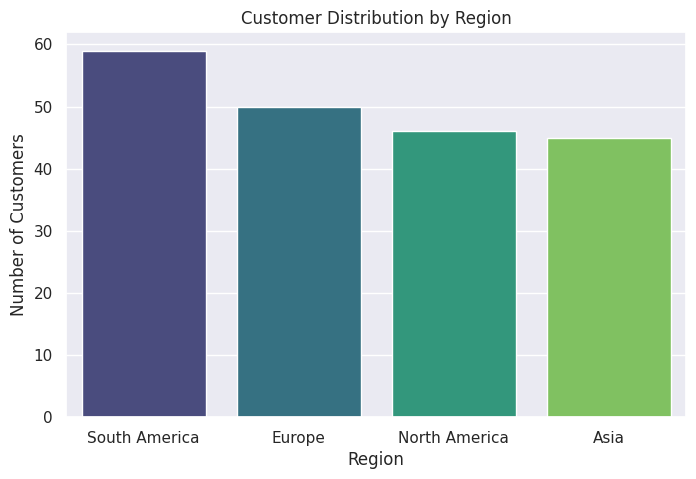

In [23]:
# 1. Region Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

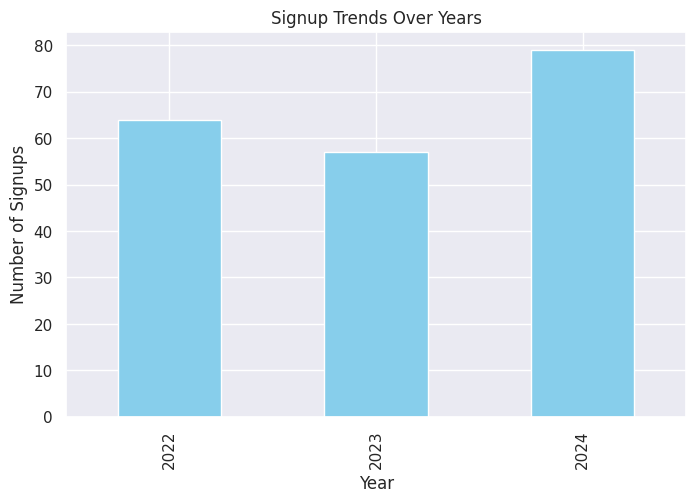

In [24]:
# 2. Signup Trends
plt.figure(figsize=(8, 5))
signup_trends.plot(kind="bar", color="skyblue")
plt.title("Signup Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

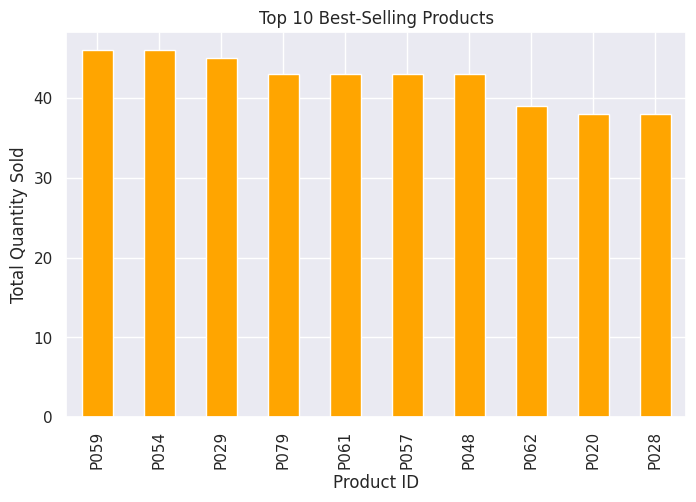

In [25]:
# 3. Top-Selling Products
plt.figure(figsize=(8, 5))
top_products.head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.show()

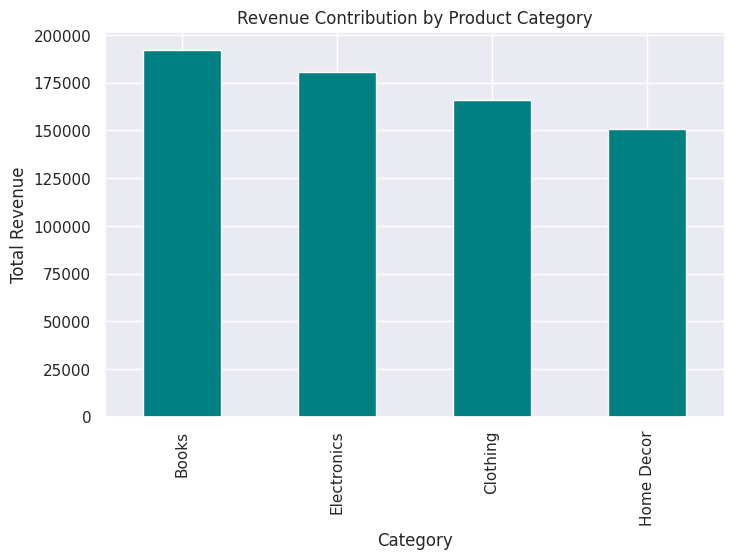

In [26]:
# 4. Revenue Contribution by Category
plt.figure(figsize=(8, 5))
category_revenue.plot(kind="bar", color="teal")
plt.title("Revenue Contribution by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.show()

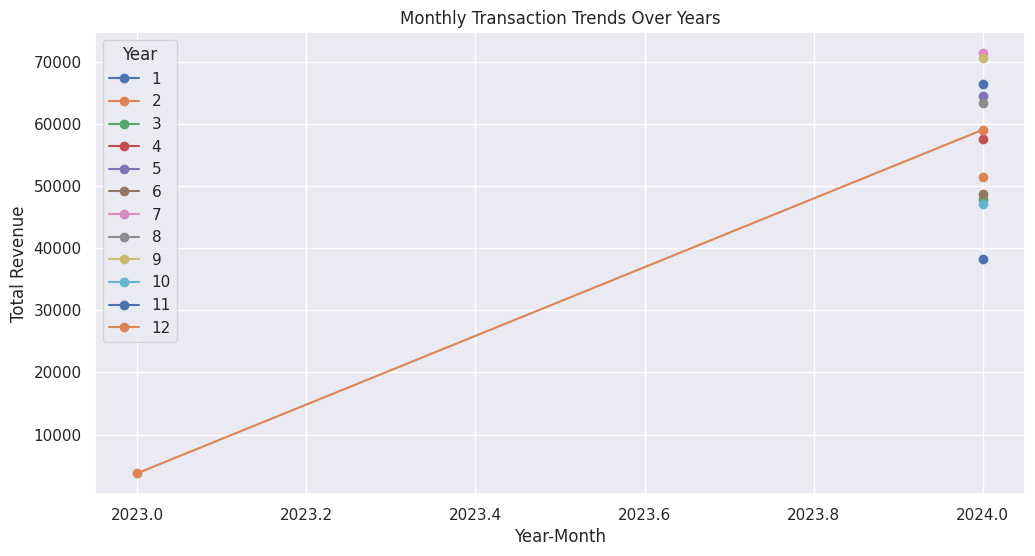

In [27]:
# 5. Monthly Transaction Trends
monthly_trends.unstack().plot(kind="line", figsize=(12, 6), marker="o")
plt.title("Monthly Transaction Trends Over Years")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.legend(title="Year", loc="upper left")
plt.show()

outliers

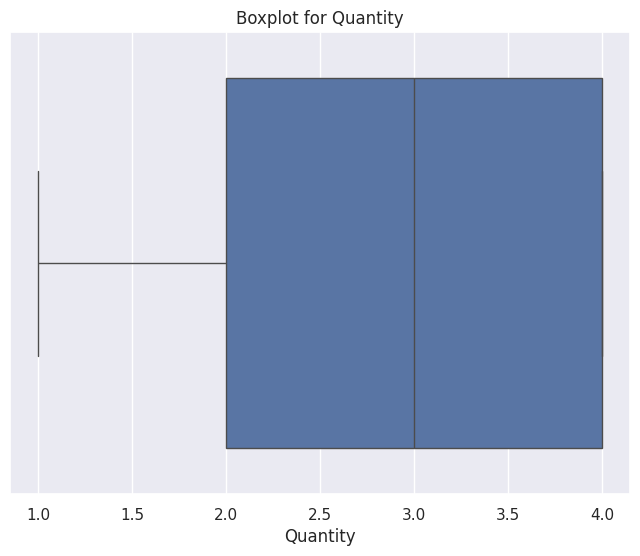

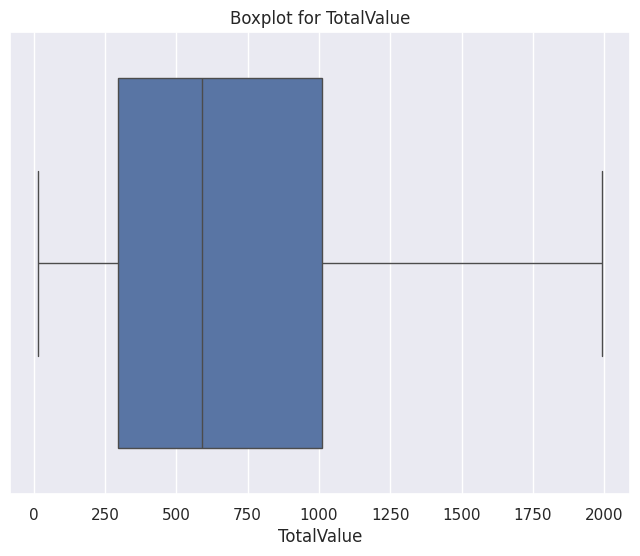

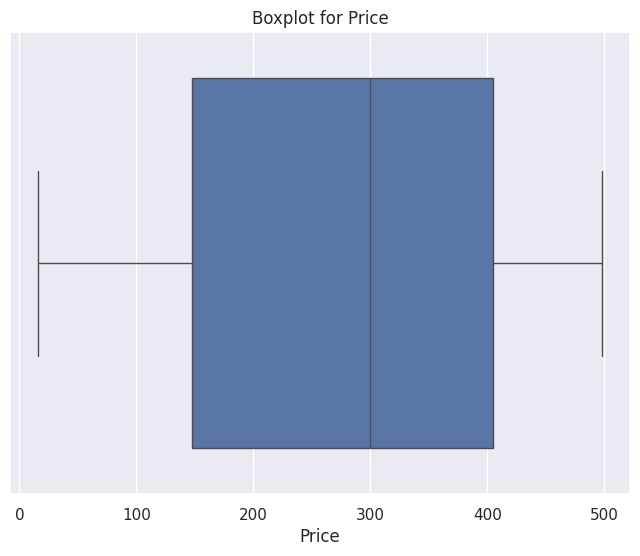

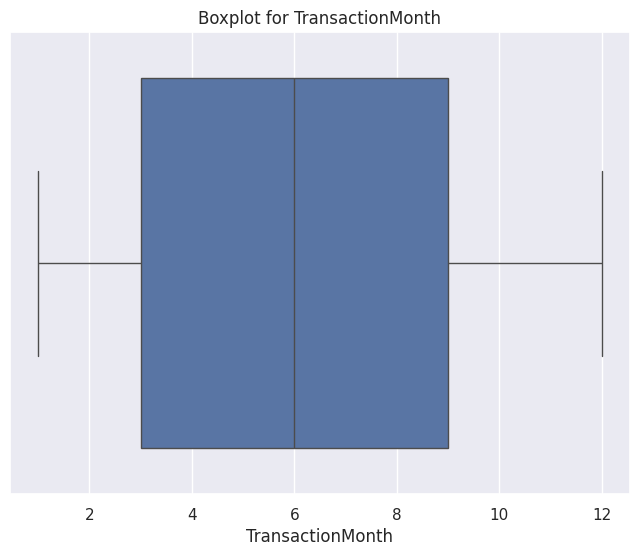

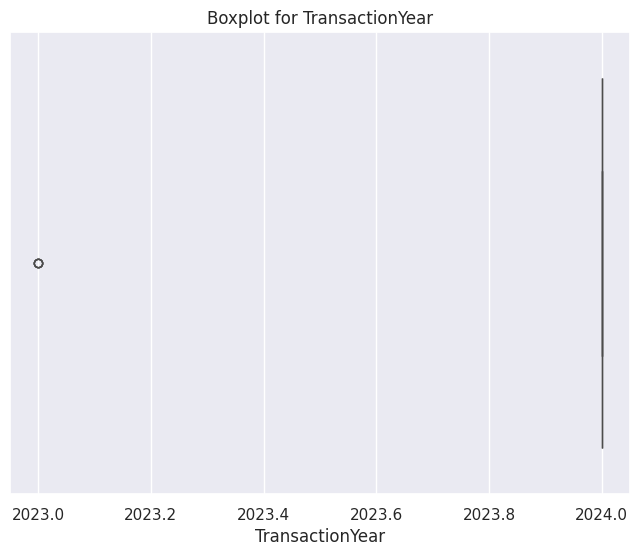

In [41]:
# Create boxplots for each numeric column
for column in transactions.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=transactions[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


In [42]:
# Function to detect outliers using IQR method
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

# Iterate through each numeric column
for column in transactions.select_dtypes(include=np.number).columns:
    # Find outliers using the IQR method
    outliers = find_outliers_iqr(transactions[column])

    # Print the number of outliers for each column
    print(f"Number of outliers in {column}: {outliers.sum()}")


Number of outliers in Quantity: 0
Number of outliers in TotalValue: 0
Number of outliers in Price: 0
Number of outliers in TransactionMonth: 0
Number of outliers in TransactionYear: 4


In [43]:
# Iterate through each numeric column
for column in products.select_dtypes(include=np.number).columns:
    # Find outliers using the IQR method
    outliers = find_outliers_iqr(products[column])

    # Print the number of outliers for each column
    print(f"Number of outliers in {column}: {outliers.sum()}")

Number of outliers in Price: 0


In [44]:
# Iterate through each numeric column
for column in customers.select_dtypes(include=np.number).columns:
    # Find outliers using the IQR method
    outliers = find_outliers_iqr(customers[column])

    # Print the number of outliers for each column
    print(f"Number of outliers in {column}: {outliers.sum()}")

Number of outliers in SignupYear: 0


Distribution

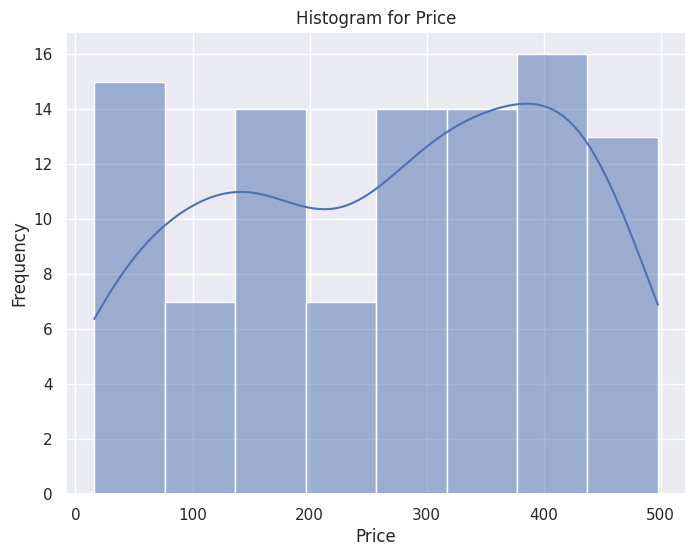

In [31]:
# Create histograms for each numeric column
for column in products.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(products[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


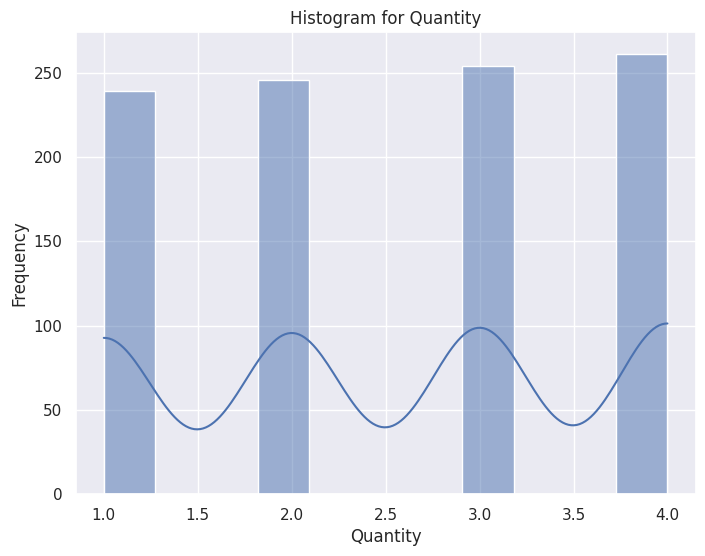

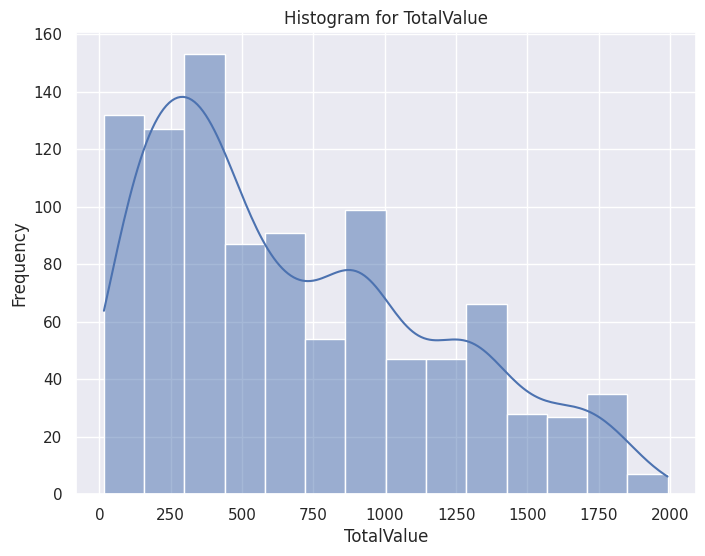

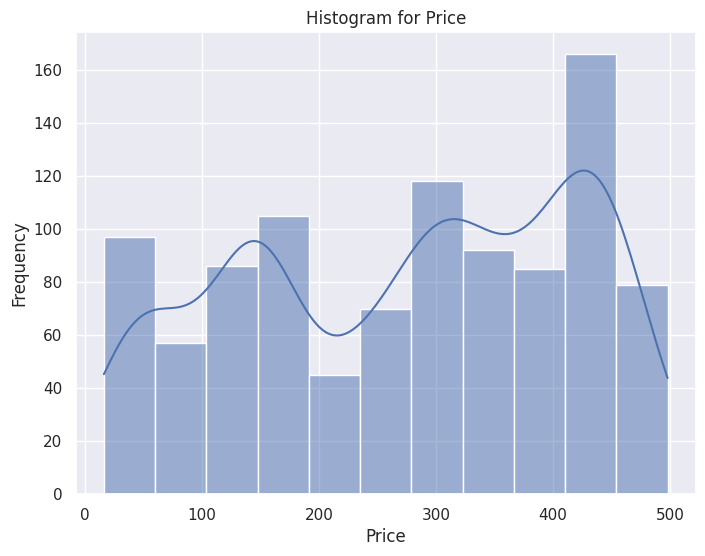

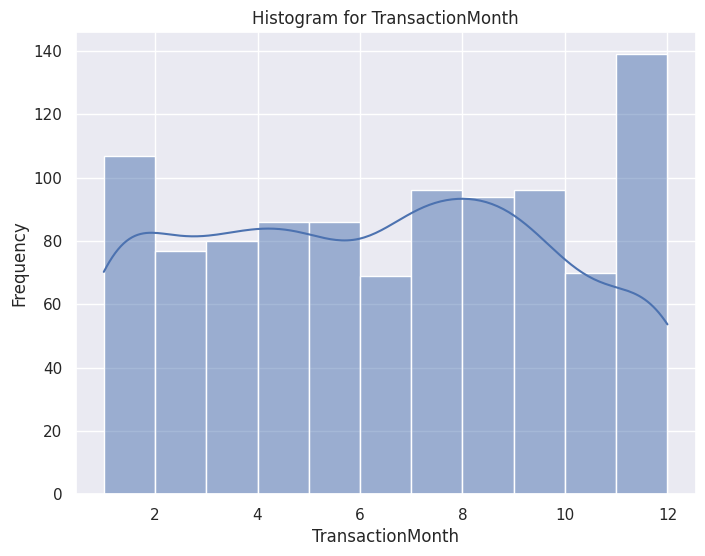

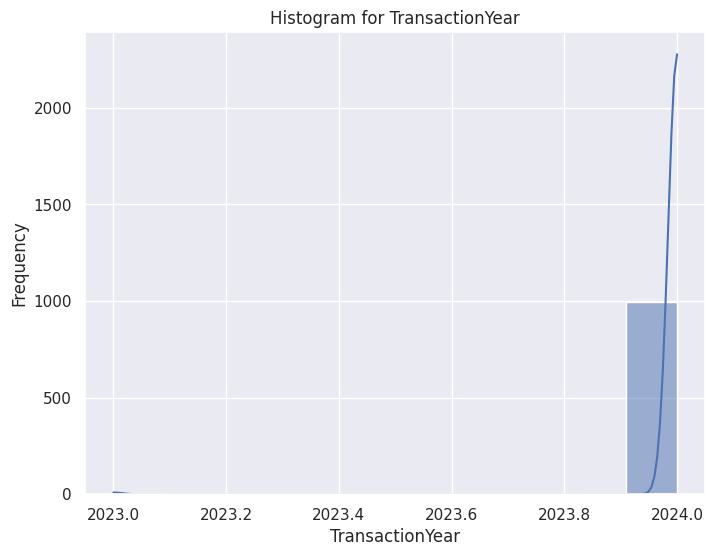

In [32]:
# Create histograms for each numeric column
for column in transactions.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(transactions[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Correlation

In [33]:
# Select only the numeric columns
numeric_df = transactions.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Print the correlation matrix
print(corr_matrix)


                  Quantity  TotalValue     Price  TransactionMonth  \
Quantity          1.000000    0.609972 -0.009378          0.033166   
TotalValue        0.609972    1.000000  0.722714          0.063087   
Price            -0.009378    0.722714  1.000000          0.049706   
TransactionMonth  0.033166    0.063087  0.049706          1.000000   
TransactionYear  -0.026258   -0.032449 -0.017852         -0.105346   

                  TransactionYear  
Quantity                -0.026258  
TotalValue              -0.032449  
Price                   -0.017852  
TransactionMonth        -0.105346  
TransactionYear          1.000000  


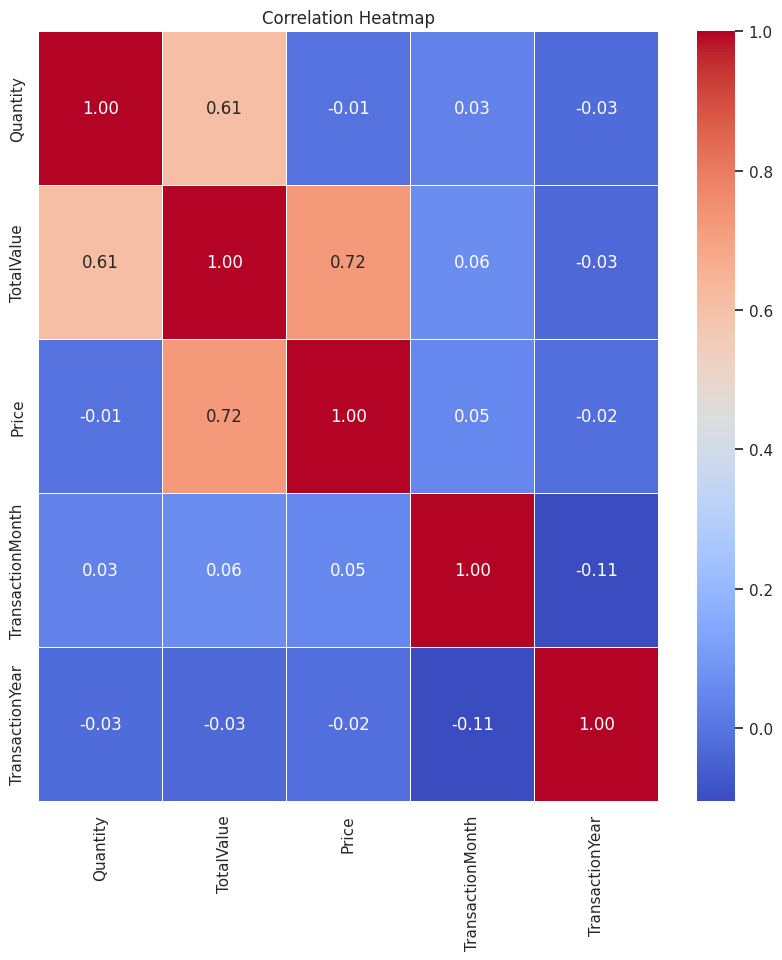

In [37]:
# Select only the numeric columns
numeric_df = transactions.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()
